In [ ]:
#Тут константы: итерация 0(особая), входящий поток, значение черной дыры и забивочные переменные х,у для определения весов ребер. Тут граф строится
c = 0
w_In = 1500000
x = 0
y = 0
votes_Quote_Achieve_Iteration = 0

listOfEdges =[['s','Greece'], ['s','Bulgaria'], ['s','Italy'], ['s','Spain'], ['s','Albania'],
              ['Greece','Bulgaria'], ['Greece','NM'],['Greece','Albania'],['Greece','Italy'],['Greece','Croatia'],
              ['Greece','Slovenia'], ['Bulgaria', 'Romania'], ['Bulgaria', 'NM'], ['Bulgaria', 'Serbia'], ['NM','Albania'],
              ['NM','Kosovo'], ['NM','Serbia'], ['Albania','Italy'], ['Albania','MNE'], ['Albania','Kosovo'],
              ['Albania','Croatia'], ['Albania','Slovenia'], ['Kosovo','Serbia'], ['Kosovo','MNE'],['Romania','Hungary'],
              ['Romania','Serbia'],['Serbia','MNE'],['Serbia','BH'],['Serbia','Croatia'],['Serbia','Hungary'],['MNE','BH'],
              ['MNE','Croatia'],['MNE','Slovenia'],['MNE','Italy'],['BH','Croatia'],['BH','Italy'],['Croatia','Slovenia'],
              ['Croatia','Hungary'],['Croatia','Italy'],['Slovenia','Italy'],['Slovenia','Austria'],['Slovenia','Hungary'],
              ['Hungary','Slovakia'],['Hungary','Austria'],['Slovakia','Austria'],['Slovakia','CZ'],['Slovakia','Poland'],
              ['Austria','Italy'],['Austria','Swiss'],['Austria','Germany'],['Austria','CZ'],['CZ','Germany'],['CZ','Poland'],
              ['Poland','Lithuania'],['Poland','Germany'],['Poland','Latvia'],['Poland','Estonia'],['Poland','Finland'],
              ['Poland','Sweden'],['Poland','Denmark'],['Lithuania','Latvia'],['Lithuania','Estonia'],['Lithuania','Finland'],
              ['Lithuania','Sweden'],['Lithuania','Denmark'],['Lithuania','Germany'],['Latvia','Estonia'],['Latvia','Finland'],
              ['Latvia','Sweden'],['Latvia','Denmark'],['Latvia','Germany'],['Estonia','Finland'],['Estonia','Sweden'],
              ['Estonia','Denmark'],['Estonia','Germany'],['Finland','Sweden'],['Finland','Norway'],['Finland','Denmark'],
              ['Finland','Germany'],['Sweden','Norway'],['Sweden','Denmark'],['Sweden','Germany'],['Norway','Denmark'],['Norway','Germany'],
              ['Denmark','Germany'],['Denmark','Netherlands'],['Germany','Netherlands'],['Germany','Belgium'],['Germany','Luxemburg'],
              ['Germany','France'],['Germany','Swiss'],['Netherlands','UK'],['Netherlands','Belgium'],['Netherlands','France'],
              ['UK','France'],['UK','Ireland'],['UK','Belgium'],['Belgium','Luxemburg'],['Belgium','France'],['Luxemburg','France'],
              ['France','Swiss'],['France','Italy'],['France','Spain'],['Swiss','Italy'],['Italy','Spain'],
              ['Spain','Portugal'],['Greece','q'],['Bulgaria','q'],['NM','q'],['Albania','q'],['Kosovo','q'],['Romania','q'],
              ['Serbia','q'],['MNE','q'],['BH','q'],['Croatia','q'],['Slovenia','q'],['Hungary','q'],['Slovakia','q'],['Austria','q'],
              ['CZ','q'],['Poland','q'],['Lithuania','q'],['Latvia','q'],['Estonia','q'],['Finland','q'],['Sweden','q'],['Norway','q'],
              ['Denmark','q'],['Germany','q'],['Netherlands','q'],['UK','q'],['Belgium','q'],['Luxemburg','q'],['France','q'],['Swiss','q'],
              ['Italy','q'],['Spain','q'],['Portugal','q']]

#ParametersSheets are [Population 2022 (thousands), GDP at 2022 (thousands), medianNetSalary (eu/hour in prices of 2022), avgWageShift per 1k migrants,
#wage per capita(wage*Labour force/GDP), wageElasticity (dlog(|Shift|)/dlog(|LF|)),
#integrationCosts (thousands euro per migrant) (=1*(min wage 2023) OR (median wage in 2020(+avg.inflation rate by complex percent)) - (standard customer basket for 2 adults+1children*12months))]
verticesDict = {'s': [w_In, 0, 0, 0, 0, 0, 0],
                'Greece': [10858, 196690000, 8, -0.00155, 0.55,  -0.7434, 14.508],
                'Bulgaria': [7030, 50201000, 4.05, -0.000843, 0.41,  -0.68827, 14.22],
                'NM': [2069, 10067000, 3.57, -0.00319, 0.543, -0.60677, 13.896],
                'Albania': [2886, 11364000, 2.47, -0.001365, 0.47, -0.8869, 16.44],
                'Kosovo': [1805, 6444000, 3.1, -0.0057, 0.5, -0.45321, 8.4],
                'Romania':[19871, 177895000, 5.55, -0.00049, 0.39, -0.63026, 12.588],
                'Serbia':[7114, 39629000, 4.43, -0.00096, 0.48, -0.68144, 17.496],
                'MNE':[622, 4055000, 3.1, -0.00901, 0.6, -0.84174, 13.524],
                'BH':[3825, 16210000, 4.83, -0.00293, 0.69, -0.61787, 12.948],
                'Croatia':[4181, 49519000, 6.82, -0.0022, 0.485, -0.68828, 16.944],
                'Slovenia':[2063, 43124000, 10.47, -0.00814, 0.47, -0.56358, 18.624],
                'Hungary':[9816, 123074000, 5.73, -0.00099, 0.42, -0.62456, 13.524],
                'Slovakia':[5421, 87814000, 7.72, -0.00223, 0.38, -0.63434, 15.936],
                'Austria':[8585, 381998000, 17.65, -0.00341, 0,57, -0.549, 16.273],
                'CZ':[10538, 186830000, 8.23, -0.00147, 0.37, -0.48676, 16.632],
                'Poland':[38006, 477568000, 6.9, -0.0003, 0.47, -0.79847, 15.048],
                'Lithuania':[2927, 41538000, 8.82, -0.00361, 0.34, -0.6298, 15.336],
                'Latvia':[1986, 26986000, 7.15, -0.0055, 0.4, -0.58057, 15.768],
                'Estonia':[1315, 22916000, 9.38, -0.00988, 0.43, -0.51327, 17.196],
                'Finland':[5472, 232582000, 19.33, -0.00645, 0.557, -0.50103, 14.52],
                'Sweden':[9747, 498118000, 19.29, -0.00333, 0.516, -0.51626, 11.593],
                'Norway':[5166, 386663000, 31.49, -0.00964, 0.49, -0.43272, 13.988],
                'Denmark':[5660, 302673000, 29.83, -0.00911, 0.574, -0.4451, 18.633],
                'Germany':[81198, 3383091000, 19.39, -0.00041, 0.66, -0.69366, 13.5],
                'Netherlands':[16901, 765650000, 18.95, -0.00182, 0.65, -0.53743, 10.260],
                'UK':[64853, 2897060000, 18.2, -0.00047, 0.64, -0.67044, 12.444],
                'Ireland':[4678, 290858000, 20.25, -0.00736, 0.358, -0.43779, 15.744],
                'Belgium':[11237, 456067000, 23.84, -0.00369, 0,564, -0.51128, 8.232],
                'Luxemburg':[527, 57233000, 23.99, -0.06058, 0.31, -0.31093, 13.008],
                'France':[66458, 2439435000, 16.81, -0.00051, 0.527, -0.6092, 13.38],
                'Swiss':[8238, 679721000, 37.64, -0.00656, 0.635, -0.6361, 14.4],
                'Italy':[60295, 1833195000, 13.05, -0.0005, 0.475, -0.62327, 12.294],
                'Spain':[46426, 1199688000, 11.02, -0.00044, 0.565, -0.63569, 12.516],
                'Portugal':[10395, 199521000, 6.24, -0.00106, 0.5, -0.69688, 16.332],
                'q':[1000000, 0, 0, 0, 0, 0, 0]
}

ProfitsVectorByAgents = 0
alpha = 0.37
crimeRatio = 0.01
remittancesRatio = 0.3
reproductionRatio = 0.1
inflationRatio = 0.05
socialEnthropyRatio = 0.33

value_list = []
InterQlist = []
voting_Vector=[]
all_Votes_Vector = []
countries_Vector=[]
total_Voting=[]
SolowModelProfitsVector = []
ProfitsVectorByAgents = []
OverallProfitsByIteration = []
list_for_K=[]
coalition=[]
players_coalition=[]
players_to_share=[]
coalition_profit=[]
profit_a = []
profits_M = []


#Тут мы строим репрезентацию графа по edge и смотрим нужные списки вершин, например списки соседей
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np
import pandas as pd

G = nx.Graph()

In [ ]:
def FullCFModel(w_In, listOfEdges, verticesDict, alpha, crimeRatio, remittancesRatio, reproductionRatio, socialEnthropyRatio):
  w_q = -1*w_In
  def omegaCount(G, edgeNumber):
    omega = min(verticesDict.get(listOfEdges[edgeNumber][0])[0]*0.01, verticesDict.get(listOfEdges[edgeNumber][1])[0]*0.01)
    return omega

  reframingList = [(listOfEdges[item][0], listOfEdges[item][1], omegaCount(G, item)) for item in range(len(listOfEdges))]
  G.add_weighted_edges_from(reframingList)

  def omega1(x, y, c, G):
    if G.has_edge(x, y):
      if x == 's':
        omega = w_In/G.degree['s']
      elif y == 's':
        omega = 0
      else:
        omega = G.get_edge_data(x,y)['weight']
    else:
      omega = 0
    return omega

  value_list = []
  value_list.clear()

  def w(x):
    if x == 's':
      w = w_In
    elif x == 'q':
      w = w_q
    else:
      w = 0
    return w

  for i in range(len(list(G.nodes))):
    value_list.append(w(list(G.nodes)[i]))

  #Определяем сумму файринга для каждой вершины
  def total_To_Fire(i, G):
    currentVal = 0
    new_value = 0
    for j in list(G.neighbors(i)):
      currentVal = omega1(i, j, c, G)
      new_value += currentVal
    return new_value

  #Делаем список сумм файринга
  firing_list = []
  for i in list(G.nodes):
    firing_list.append(total_To_Fire(i,G))

  #лист-связка ценность вершины - сумма файринга
  fired_firing_list = [(i,j) for i,j in zip(value_list,firing_list)]
  #связка вершина - текущая ценность - сумма файринга
  vertices_fired_firing_list = [(i,j,k) for i,j,k in zip(G.nodes, value_list,firing_list)]
  S_fired_firing_list = sorted(vertices_fired_firing_list, key = lambda x: x[1], reverse = True)

  for k in range(len(fired_firing_list)):
    print(vertices_fired_firing_list[k])

  def vertex_To_Be_Fired(G, vertices_fired_firing_list):
    FFL = vertices_fired_firing_list
    FL = [item for item in FFL if item[1] >= item[2]]
    SFL = sorted(FL, key = lambda x: x[1], reverse = True)
    value_To_Fire = SFL[0][1]
    vertex_To_Fire = SFL[0][0]
    FL.clear()
    return value_To_Fire, vertex_To_Fire

  vertex_To_Be_Fired(G, vertices_fired_firing_list)
  value_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[0]
  vertex_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[1]

  #Убеждаемся, что за итерация игры. После первой итерации игра к с==0 вернуться не должна.
  def check_iter(vertex_To_Fire):
    if vertex_To_Fire == 's':
      c = 0
    else:
      c = 1
    return c

  #c = check_iter(vertex_To_Fire)

  #Выводим сумму, сколько будем вычитать из ценности vertex_To_Fire
  def summ_To_Fire(vertex_To_Fire, G):
    c = check_iter(vertex_To_Fire)
    new_value = 0
    for i in list(G.neighbors(vertex_To_Fire)):
      currentVal = omega1(vertex_To_Fire, i, c, G)
      new_value += currentVal
    return new_value
  #Вычитаем сумму ребер между vertex_To_Fire и ее соседями, задаем, что новая ценность вершины под индексом vertex_To_Fire равна разности ее ценности до fire и весов ребер
  def fired_vertex(vertex_To_Fire, value_To_Fire, G):
    a = value_To_Fire - summ_To_Fire(vertex_To_Fire, G)
    return a

  #Тут добавляем каждому соседу vertex_To_Fire ценность, равную весу ребра между ней и vertex_To_Fire
  def add(vertex_To_Fire, value_list, G):
    c = check_iter(vertex_To_Fire)
    for i in list(G.neighbors(vertex_To_Fire)):
        b = value_list[list(G.nodes).index(i)] + omega1(vertex_To_Fire, i,c, G)
        value_list[list(G.nodes).index(i)] = b
    return value_list

  def matrix(j, value_list):
    profits_Matrix=value_list[j]
    return profits_Matrix

  def adoptionC(i):
    adoptionCostRatio = (1+(1*reproductionRatio)**1)/(math.log(verticesDict.get(list(G.nodes)[i])[0]+0.0001, 2))
    return adoptionCostRatio

  def InterQ (i):
    adoptCost = adoptionC(i)
    if list(G.nodes)[i] == 's':
      intraCountryQ = 0
    elif list(G.nodes)[i] == 'q':
      intraCountryQ = 0
    else:
      intraCountryQ = (np.e**(2.652+0.233*(value_list[i]/verticesDict.get(list(G.nodes)[i])[0]))*verticesDict.get(list(G.nodes)[i])[6]*1000*value_list[i]*crimeRatio)+(26642*((value_list[i]/verticesDict.get(list(G.nodes)[i])[0])**2) + 15231*value_list[i]+20000)+(value_list[i]*0.6*(verticesDict.get(list(G.nodes)[i])[2]-value_list[i]*verticesDict.get(list(G.nodes)[i])[3])*1800*remittancesRatio)+(verticesDict.get(list(G.nodes)[i])[6]*1000*value_list[i])
    return intraCountryQ

  def chip_firing_game(value_list, firing_list, G):
    fired_firing_list = [(i,j) for i,j in zip(value_list,firing_list)]
    vertices_fired_firing_list = [(i,j,k) for i,j,k in zip(G.nodes, value_list,firing_list)]
    cont_Criterion = [item for item in fired_firing_list if item[0]>=item[1]]
    if len(cont_Criterion) >= 1:
      value_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[0]
      index_To_Fire = value_list.index(value_To_Fire)
      vertex_To_Fire = vertex_To_Be_Fired(G, vertices_fired_firing_list)[1]

      value_list[index_To_Fire] = fired_vertex(vertex_To_Fire, value_To_Fire, G)
      value_list = add(vertex_To_Fire, value_list, G)
      return value_list, ''
    else:
      return value_list, 'Game over with'

  for i in range (1000):
    print(value_list)
    profit_a.append([value_list[j] for j in range(len(value_list))])
    value_list, msg = chip_firing_game(value_list, firing_list, G)
    InterQlist.append([InterQ(j) for j in range(len(value_list))])
    print(msg)
    if msg == 'Game over with':
      print(f'{msg}:{value_list} at the iteration {i}')
      break

  def interQByIteration(i):
    if i <= len(InterQlist):
      iterVectorQ = InterQlist[i]
      return iterVectorQ
    else:
      msg = 'No such iteration'
      return msg

  profits_M = np.transpose(profit_a)

  profits_M

  countries_Vector = list(G.nodes)

  for i in range(len(countries_Vector)):
    if countries_Vector[i] != 's':
      if countries_Vector[i] != 'q':
        list_for_K.append(i)
      else:
        continue
    else:
      continue

  def interQByAgent(j):
    if j <= len(InterQlist[0]):
      agentVectorQ = np.transpose(InterQlist)
      agentVectorQPart = agentVectorQ[j]
      return agentVectorQPart
    else:
      msg = 'No such agent'
      return msg

  def profitFunction(profits_M, i):
    SolowModelProfitsVector.clear()
    for j in range(len(profits_M[i])):
      SolowModelProfitsVector.append(-0.5*verticesDict.get(list(G.nodes)[i])[4]*verticesDict.get(list(G.nodes)[i])[5]*((profits_M[i][j]/verticesDict.get(list(G.nodes)[i])[0])**2)*verticesDict.get(list(G.nodes)[i])[1]*1000)
    return SolowModelProfitsVector

  ProfitsVectorByAgents = []
  for i in list_for_K:
    ProfitsVectorByAgents.append([profitFunction(profits_M, i)[j] for j in range(len(profits_M[0]))])

  OverallProfitsByIteration = []
  for j in range(len(ProfitsVectorByAgents[0])):
    OverallProfitsByIteration.append(sum([ProfitsVectorByAgents[i][j] for i in range(len(ProfitsVectorByAgents)-1)]))

  def votes(profits_M, k):
    a = interQByAgent(k)
    voting_Vector.clear()
    for i in range(len(profits_M[k])):
      if i<len(profit_a)-1:
        if profitFunction(profits_M, k)[i]-a[i]>=max((profitFunction(profits_M, k)[i+1:len(profits_M[k])])-a[i]):
          voting_Vector.append(1)
        else:
          voting_Vector.append(0)
      else:
        break
    return voting_Vector

  all_Votes_Vector.clear()
  for k in list_for_K:
    all_Votes_Vector.append(list(votes(profits_M, k)))

  votes_by_Iteration = np.transpose(all_Votes_Vector)
  votes_Quote_Achieve_Iteration = 0

  for i in range(len(votes_by_Iteration)):
    if sum(votes_by_Iteration[i]) < 0.75*len(votes_by_Iteration[i]):
      continue
    else:
      coalition.extend(votes_by_Iteration[i])
      votes_Quote_Achieve_Iteration = i
      print(f'voting structure is:{coalition} within iteration {i}')
      break

  for i in range(len(coalition)):
    if coalition[i] == 1:
      players_coalition.append(list_for_K[i])
    else:
      continue

  players_to_share.extend(list(G.nodes)[i] for i in players_coalition)
  coalition_profit.extend(profitFunction(profits_M, list(G.nodes).index(i))[votes_Quote_Achieve_Iteration]-interQByAgent(list(G.nodes).index(i))[votes_Quote_Achieve_Iteration] for i in players_to_share)
  print(f'coalition is:{players_to_share} with profits:{coalition_profit} with total profit of:{sum(coalition_profit)}')
  print(f'Total profit of agents is: {OverallProfitsByIteration[votes_Quote_Achieve_Iteration]}')
  print(profits_M[-1][0] - profits_M[-1][-1])
  print(sum(InterQlist[-1]))
  print(InterQlist[-1])

  return votes_Quote_Achieve_Iteration, profits_M, OverallProfitsByIteration[votes_Quote_Achieve_Iteration], players_to_share, coalition_profit,ProfitsVectorByAgents,OverallProfitsByIteration, profits_M[-1][0] - profits_M[-1][-1], InterQlist[-1]

In [ ]:
value_list.clear()
coalition.clear()
profit_a.clear()
ProfitsVectorByAgents.clear()
OverallProfitsByIteration.clear()
players_to_share.clear()
coalition_profit.clear()
players_coalition.clear()
list_for_K.clear()
InterQlist.clear()
voting_Vector.clear()
all_Votes_Vector.clear()
SolowModelProfitsVector.clear()

iterations, MigrantsFlowByPlayer, TP, CoalitionOfAgreement, CoalitionOfAgreementProfit, ProfitsOfAllAgents, OverallProfitForIterationList, MQ, TQ = FullCFModel(27500, listOfEdges, verticesDict, alpha, crimeRatio, remittancesRatio, reproductionRatio, socialEnthropyRatio)

('s', 27500, 27500.0)
('Greece', 0, 399.45)
('Bulgaria', 0, 301.89)
('Italy', 0, 2082.74)
('Spain', 0, 1496.73)
('Albania', 0, 181.02999999999997)
('NM', 0, 121.5)
('Croatia', 0, 303.01)
('Slovenia', 0, 150.63)
('Romania', 0, 438.30999999999995)
('Serbia', 0, 408.74)
('Kosovo', 0, 78.42)
('MNE', 0, 49.76)
('Hungary', 0, 469.96000000000004)
('BH', 0, 159.22)
('Austria', 0, 586.47)
('Slovakia', 0, 271.05)
('CZ', 0, 456.2)
('Poland', 0, 1190.7800000000002)
('Swiss', 0, 411.9)
('Germany', 0, 2739.61)
('Lithuania', 0, 208.63000000000002)
('Latvia', 0, 152.17000000000002)
('Estonia', 0, 105.20000000000002)
('Finland', 0, 387.5400000000001)
('Sweden', 0, 517.6700000000001)
('Denmark', 0, 451.6600000000001)
('Norway', 0, 258.3)
('Netherlands', 0, 845.01)
('Belgium', 0, 567.12)
('Luxemburg', 0, 21.080000000000002)
('France', 0, 3413.9300000000003)
('UK', 0, 1625.2199999999998)
('Ireland', 0, 46.78)
('Portugal', 0, 207.9)
('q', -27500, 5334.909999999999)
[27500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
MFList = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
ProfitMFList = []
LossMFList= []
IterMFList = []
MQsMFList = []

for unit in MFList:
  value_list.clear()
  coalition.clear()
  profit_a.clear()
  ProfitsVectorByAgents.clear()
  OverallProfitsByIteration.clear()
  players_to_share.clear()
  coalition_profit.clear()
  players_coalition.clear()
  list_for_K.clear()
  InterQlist.clear()
  voting_Vector.clear()
  all_Votes_Vector.clear()
  SolowModelProfitsVector.clear()
  iterations, MigrantsFlowByPlayer, TP, CoalitionOfAgreement, CoalitionOfAgreementProfit, ProfitsOfAllAgents, OverallProfitForIterationList, MQ, TQ = FullCFModel(10000, listOfEdges, verticesDict, alpha, unit, remittancesRatio, reproductionRatio, socialEnthropyRatio)
  ProfitMFList.append(TP)
  LossMFList.append(sum(InterQlist[-1]))
  IterMFList.append(iterations)
  MQsMFList.append(MQ)

('s', 10000, 10000.0)
('Greece', 0, 399.45)
('Bulgaria', 0, 301.89)
('Italy', 0, 2082.74)
('Spain', 0, 1496.73)
('Albania', 0, 181.02999999999997)
('NM', 0, 121.5)
('Croatia', 0, 303.01)
('Slovenia', 0, 150.63)
('Romania', 0, 438.30999999999995)
('Serbia', 0, 408.74)
('Kosovo', 0, 78.42)
('MNE', 0, 49.76)
('Hungary', 0, 469.96000000000004)
('BH', 0, 159.22)
('Austria', 0, 586.47)
('Slovakia', 0, 271.05)
('CZ', 0, 456.2)
('Poland', 0, 1190.7800000000002)
('Swiss', 0, 411.9)
('Germany', 0, 2739.61)
('Lithuania', 0, 208.63000000000002)
('Latvia', 0, 152.17000000000002)
('Estonia', 0, 105.20000000000002)
('Finland', 0, 387.5400000000001)
('Sweden', 0, 517.6700000000001)
('Denmark', 0, 451.6600000000001)
('Norway', 0, 258.3)
('Netherlands', 0, 845.01)
('Belgium', 0, 567.12)
('Luxemburg', 0, 21.080000000000002)
('France', 0, 3413.9300000000003)
('UK', 0, 1625.2199999999998)
('Ireland', 0, 46.78)
('Portugal', 0, 207.9)
('q', -10000, 5334.909999999999)
[10000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
ResultingList = [(i,j,k,l) for i,j,k,l in zip(ProfitMFList, LossMFList, IterMFList, MQsMFList)]

In [ ]:
ResultingList

[(605690046.3224111, 212350694.95062035, 55, -3772.2000000000007),
 (605690046.3224111, 229726568.0341927, 55, -3772.2000000000007),
 (605690046.3224111, 258686356.50681338, 55, -3772.2000000000007),
 (605690046.3224111, 287646144.9794341, 55, -3772.2000000000007),
 (605690046.3224111, 316605933.45205486, 55, -3772.2000000000007),
 (605690046.3224111, 345565721.9246756, 55, -3772.2000000000007),
 (605690046.3224111, 374525510.3972963, 55, -3772.2000000000007),
 (605690046.3224111, 403485298.8699169, 55, -3772.2000000000007),
 (605690046.3224111, 432445087.3425377, 55, -3772.2000000000007),
 (605690046.3224111, 490364664.28777903, 55, -3772.2000000000007),
 (605690046.3224111, 548284241.2330205, 55, -3772.2000000000007),
 (605690046.3224111, 606203818.178262, 55, -3772.2000000000007),
 (605690046.3224111, 664123395.1235037, 55, -3772.2000000000007),
 (605690046.3224111, 779962549.0139865, 55, -3772.2000000000007)]

In [ ]:
trashlist = []

for i in range(len(profit_a)):
  trashlist.append(i)

trashlist

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [ ]:
list(G.nodes).index('Serbia')

10

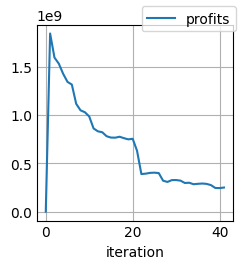

In [ ]:
data = {
    'iteration': trashlist,
    'profits': OverallProfitForIterationList,
}


df = pd.DataFrame(data)

ax = df.plot(x='iteration', y="profits", legend=False)
ax.figure.legend()
plt.show()

In [ ]:
list_for_Graph = []

In [ ]:
list(verticesDict)

['s',
 'Greece',
 'Bulgaria',
 'NM',
 'Albania',
 'Kosovo',
 'Romania',
 'Serbia',
 'MNE',
 'BH',
 'Croatia',
 'Slovenia',
 'Hungary',
 'Slovakia',
 'Austria',
 'CZ',
 'Poland',
 'Lithuania',
 'Latvia',
 'Estonia',
 'Finland',
 'Sweden',
 'Norway',
 'Denmark',
 'Germany',
 'Netherlands',
 'UK',
 'Ireland',
 'Belgium',
 'Luxemburg',
 'France',
 'Swiss',
 'Italy',
 'Spain',
 'Portugal',
 'q']

In [ ]:
for i in list(G.nodes):
  if i != 's':
    if i != 'q':
      list_for_Graph.append(i)
    else:
      continue
  else:
    continue

In [ ]:
FlowByIter = np.transpose(MigrantsFlowByPlayer)[41]

In [ ]:
ListFlowByIter = list(FlowByIter)

In [ ]:
ListFlowByIter.pop(-1)

-3988.5800000000013

In [ ]:
ListFlowByIter.remove(0)

In [ ]:
ListVertices = list(verticesDict)

In [ ]:
ListVertices.pop(-1)

'q'

<BarContainer object of 34 artists>

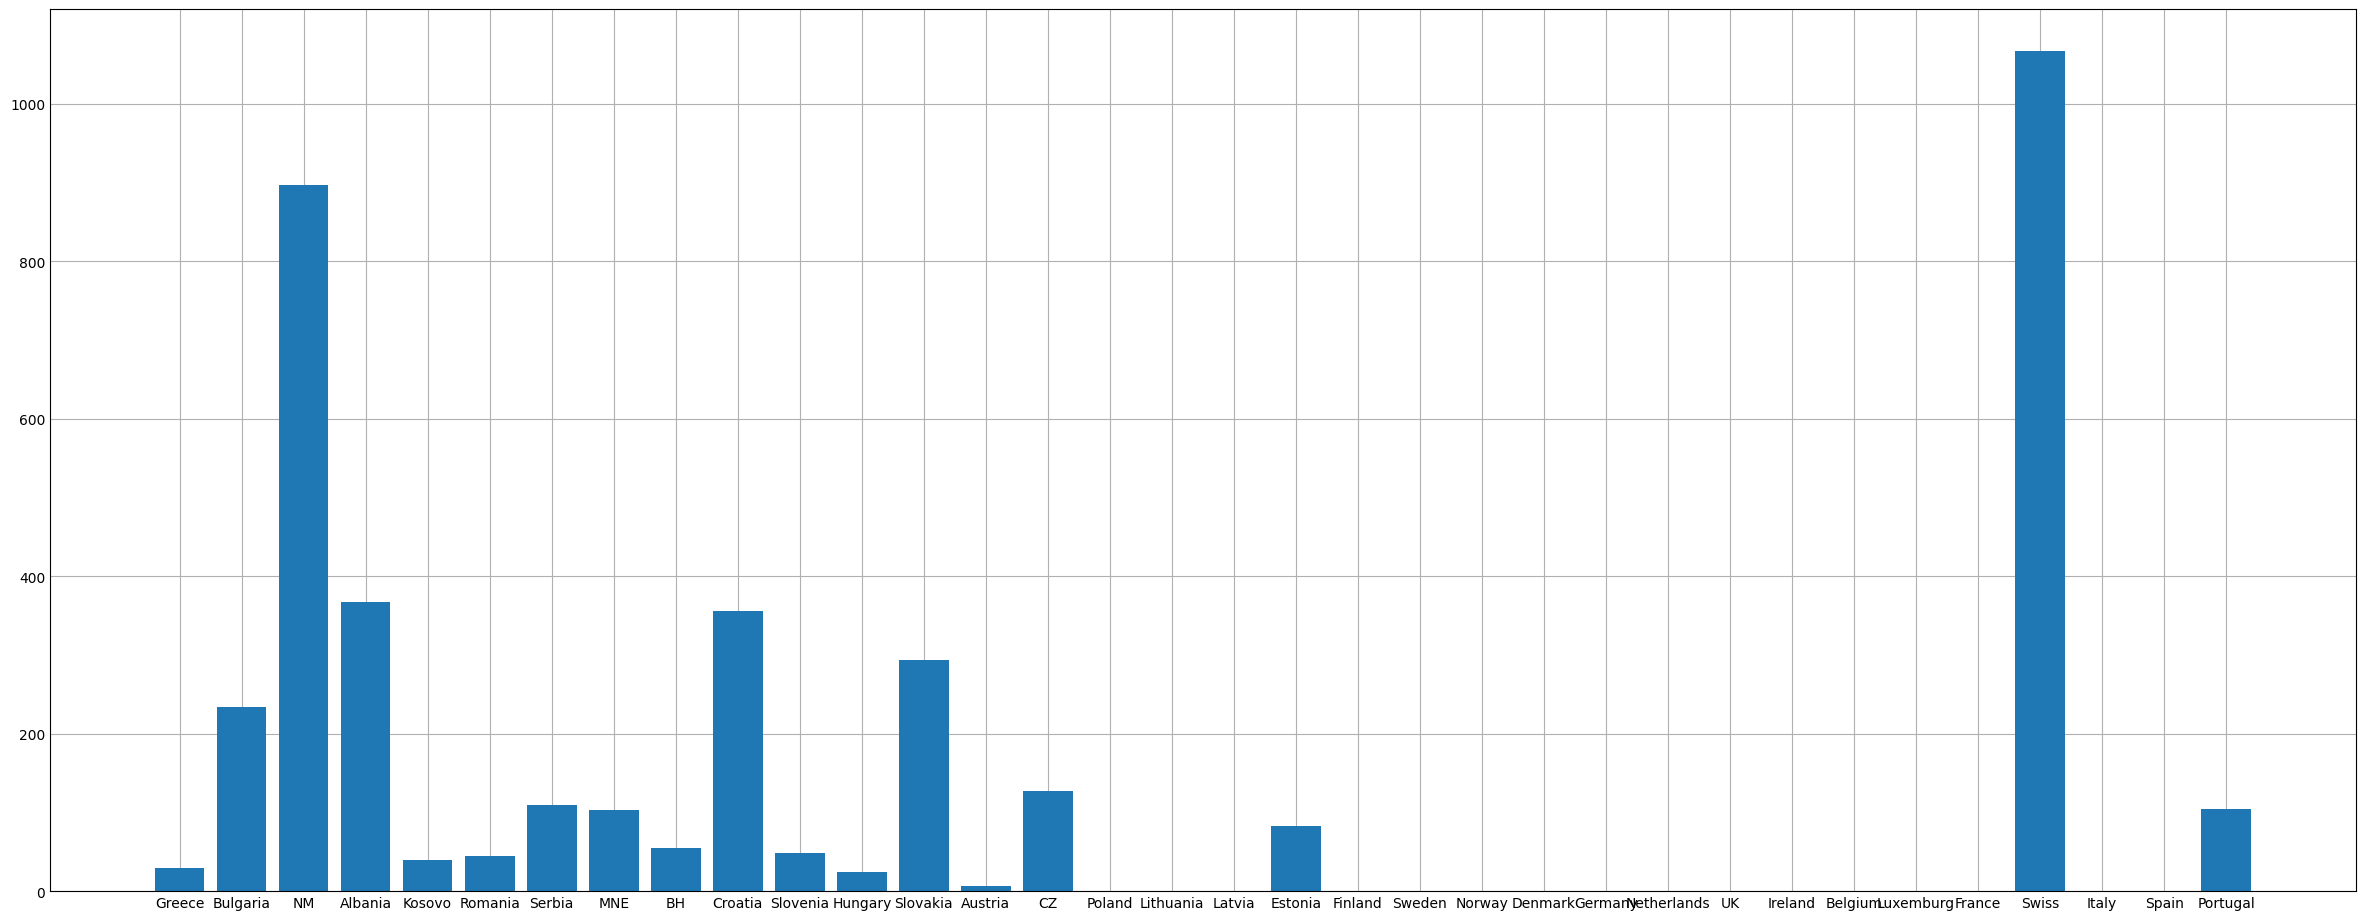

In [ ]:
plt.style.use('_mpl-gallery')

x = list_for_Graph
y = ListFlowByIter

plt.figure(figsize=(80, 9))

plt.subplot(131)
plt.bar(x, y)

In [ ]:
len(np.transpose(InterQlist[1]))

36

In [ ]:
print(np.transpose(InterQlist[1]))

[ 0.00000000e+00  3.49751512e+07  4.89560302e+07  5.09366514e+07
  4.66465286e+07  5.10652465e+07  6.87885060e+05 -5.72583766e+06
  8.44154160e+05  2.00000000e+04  2.00000000e+04  2.00000000e+04
  2.00000000e+04  2.00000000e+04  2.00000000e+04  2.00000000e+04
  2.00000000e+04  2.00000000e+04  2.00000000e+04  2.00000000e+04
  2.00000000e+04  2.00000000e+04  2.00000000e+04  2.00000000e+04
  2.00000000e+04  2.00000000e+04  2.00000000e+04  2.00000000e+04
  2.00000000e+04  2.00000000e+04  2.00000000e+04  2.00000000e+04
  2.00000000e+04  2.00000000e+04  2.00000000e+04  0.00000000e+00]


In [ ]:
-0.5*verticesDict.get('Bulgaria')[4]*verticesDict.get('Bulgaria')[5]*((233/verticesDict.get('Bulgaria')[0])**2)*verticesDict.get('Bulgaria')[1]*1000

7780835.999024424

In [ ]:
def adoptionC(i):
  adoptionCostRatio = (1+(1*reproductionRatio)**1)/(math.log(verticesDict.get(i)[0]+0.0001, 2))
  return adoptionCostRatio

adoptCost = adoptionC('Croatia')

#ACSerbia 0.86

In [ ]:
#'Serbia': [7114, 39629000, 4.43, -0.00096, 0.48, -0.68144, 17.496]

In [ ]:
#TotalLoss
verticesDict.get('Serbia')[6]*1000*290+290*0.6*(verticesDict.get('Serbia')[2]-290*verticesDict.get('Serbia')[3])*1800*remittancesRatio+26642*((290/verticesDict.get('Croatia')[0])**2) + 15231*290+20000+np.e**(2.652+0.290*(290/verticesDict.get('Croatia')[0]))*verticesDict.get('Croatia')[6]*1000*290*crimeRatio

10681423.868671091

In [ ]:
#DirectCostOfAdoption: (yearlyNetMedianWage - yearlyCustomerBasket)(in thousands)*1000*MigrantsFlow
verticesDict.get('Croatia')[6]*1000*290

4913760.0

In [ ]:
#LostProfitToCountryDGP: MigrantsFlow*(NetWage/GrossWage)*((GrossWagePerHour) - MigrantsFlow*GrossWageDecreasingRate)*WorkHours*RemittancesRatio
290*0.6*(verticesDict.get('Croatia')[2]-290*verticesDict.get('Croatia')[3])*1800*remittancesRatio

-349800865.2

In [ ]:
#y=26.642x2−15.231x+2.415: quadraticRegression for socialEnthropyRatio
26642000*math.sqrt((290/verticesDict.get('Serbia')[0]-socialEnthropyRatio)**2)+20000

7725807.146471745

In [ ]:
#y=e^(2.652+0.233x): socialSecurityServices per exponentially increasing social distability through deviant behavior of legal migrants
np.e**(2.652+0.233*(290/verticesDict.get('Serbia')[0]))*verticesDict.get('Serbia')[6]*1000*290*crimeRatio

726458.3799882786